## SMOTE + XGBoost

In [31]:
#Importing libraries ##

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost 
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_val_predict,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, auc, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, precision_recall_curve


In [32]:
random.seed(1234)
data = pd.read_csv("creditcard.csv")


In [33]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
X_data = data.drop(["Class"], axis = 1)
y_data = data[['Class']]

In [35]:
X_tr_origin, X_holdout, y_tr_origin, y_holdout = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [36]:
colnames = X_tr_origin.columns
colnames

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [37]:
print("Length of training dataset:", len(X_tr_origin))
print("Length of test dataset:", len(X_holdout))

Length of training dataset: 227845
Length of test dataset: 56962


In [38]:
### GridsearchCV and pipeline ###

model = Pipeline([
        ('sampling', SMOTE(random_state = 0)),
        ('scaling', StandardScaler()),
        ('classification', XGBClassifier(random_state =42))])


#pipe = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 10)) 
param = {'classification__learning_rate': [0.05], 'classification__n_estimators': [1000]
        }
grid_search_xgb = GridSearchCV(model, param, scoring='roc_auc',refit=True,  cv= 5)
grid_search_xgb.fit(X_tr_origin, y_tr_origin.values.ravel())
print(grid_search_xgb.best_estimator_)
xgb_best = grid_search_xgb.best_estimator_
resultsdf = pd.DataFrame(grid_search_xgb.cv_results_)
resultsdf

Pipeline(memory=None,
         steps=[('sampling',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classification',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=1000,
                               n_jobs=0, num_parallel_tree=1,
                               objective='binary:logistic', random_state=42,
          

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classification__learning_rate,param_classification__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,871.631222,121.648299,1.056419,0.113943,0.05,1000,"{'classification__learning_rate': 0.05, 'class...",0.969966,0.96665,0.952924,0.99549,0.981898,0.973385,0.0144,1



Recall: 0.8469387755102041
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56852    12]
 [   15    83]]


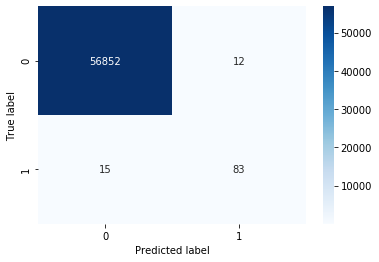

In [39]:
### checking on holdout set ###

y_pred = xgb_best.predict(X_holdout)
print("\nRecall:",recall_score(y_holdout,y_pred))
print(classification_report(y_holdout, y_pred))
conf_matrix = confusion_matrix(y_holdout,y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

So to summarize, with SMOTE we get the following:



|Algorithm|Precision|Recall| 
|--------|----|----|
|Random Forest|0.22|0.87|
|SVC|0.39|0.82|
|XGBoost|0.87|0.85|

Hence, XGBoost is the most powerful performer, giving the best f1-score of 0.86